# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  34829      0 --:--:-- --:--:-- --:--:-- 34865']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return NotImplemented


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return NotImplemented

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return NotImplemented


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

**Code with added Functions**

In [4]:
import math
import itertools
import re

def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    f.close()  # It's good practice to close the file after reading
    return data

def dot_product(array1, array2):
    # Calculate dot product of two arrays
    return sum(a * b for a, b in zip(array1, array2))

def sigmoid(x):
    # Calculate the sigmoid function
    return 1 / (1 + math.exp(-x))

def output(weight, instance):
    # Calculate the output of the model
    return sigmoid(dot_product(weight, instance[:-1]))

def predict(weights, instance):
    # Predict the label based on the model output
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    # Initialize weights to zeros
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Calculate dot product of weights and instance
            in_value = dot_product(weights, instance[:-1])
            # Compute the sigmoid of the dot product
            output = sigmoid(in_value)
            # Calculate the error as the difference between target and prediction
            error = instance[-1] - output
            # Gradient update step: update weights based on the error and the gradient
            for i in range(len(weights)):
                weights[i] += lr * error * output * (1 - output) * instance[i]

    return weights


## Run it

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




**Q1 Answer:**
**Binary vs. Continuous Output:** The sigmoid of the dot product of inputs and weights is used in the first piece of code to compute the continuous output. This continuous output is required during a perceptron's training phase, when the gradient for adjusting the weights is calculated using the raw scores. In order to calculate the error as a gradient of a loss function, the sigmoid function offers a smooth probability estimate between 0 and 1.

**Gradient and Learning:** The difference between the actual label (instance[-1]) and the anticipated probability is the gradient that is utilized to update the weights. The sigmoid function's actual output, not merely a binary classification, is needed for this gradient computation. The model can determine how far off the forecast was and which direction the weights need to be modified by using the sigmoid's continuous output.

**The goal of forecasting Function:** In contrast, the predict function returns a binary class label (0 or 1). It is intended for use at the inference stage, when the final classification outcome—rather than the probabilities—is all that matters. To determine the class label, it adds a threshold (0.5) to the sigmoid output.

**Error Calculation:** If predict were used in the training loop, the error would be determined using binary outcomes (0 or 1), which would not offer helpful learning gradients. Binary outputs would simply indicate whether the predictions were correct or incorrect, not "how wrong" or "how right." Because the model was unable to fine-tune the weights, the training process would be less successful.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

**Question 2 Answer**

In [7]:
import math
import itertools
import re

def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data.append(instance)
    f.close()
    return data

def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def output(weights, instance):
    return sigmoid(dot_product(weights, instance[:-1]))

def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0])-1)
    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance[:-1])
            output = sigmoid(in_value)
            error = instance[-1] - output
            for i in range(len(weights)):
                weights[i] += lr * error * output * (1 - output) * instance[i]
    return weights

# Assuming 'train.dat' and 'test.dat' are properly formatted and exist
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_array = [0.005, 0.01, 0.05]

# Loop through the combinations of training percentages, learning rates, and epochs
for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"# tr: {tr_size}, epochs: {epochs}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr: 5, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 5, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 5, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 5, epochs: 50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 5, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 10, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 10, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 10, epochs: 20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 10, epochs: 50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 10, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 25, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 25, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 25, epochs: 20, learning rate: 0.005; Ac

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



**Question 3 Answer**

We can learn a lot about the best circumstances for training and generalization by comparing the outcomes of a machine learning model with different combinations of hyperparameters. Your results offer a useful case study for investigating the effects of learning rate, epoch count, and training data quantity on model correctness.

**A. Training with the Entire Dataset:**
Many people think that better performance is correlated with more data. This isn't always the case, though. Based on the findings:

The accuracy was 71.0% using 20 epochs, 100 training examples, and a learning rate of 0.050.
Accuracy dropped to 68.0% when the training size was increased to 200 instances and the learning rate was decreased to 0.005 for the same number of epochs.

This suggests that improving the amount of the dataset alone does not ensure improved model performance. Important considerations include the training set's representativeness, the quality of the data, and how well hyperparameters (such learning rate) match the growing complexity of the data. This implies that if the chosen subset is accurate and the model is well calibrated, it might not be required to train using the complete dataset.

**B. Justification for Decreased Accuracy with More Training Data**
Several possible problems are highlighted by the second training run, which had additional information but a lower accuracy:

**Learning Rate Sensitivity:** Considering the larger data quantity across the same number of epochs, the lower learning rate of 0.005 could not have been sufficient to converge to the optimal solution. It's possible that a greater learning rate could have better handled the complexity increase and enabled the model to more efficiently modify its weights.

**Quality & Representativeness of Additional Data:** The learning process may have been distorted, resulting in worse generalization on the test set, if the extra 100 cases were less representative of the whole dataset or added noise.

**C. Achieving Higher Accuracy:**
It may be crucial to investigate new hyperparameters and improve current ones in order to exceed the 80.0% accuracy threshold:

To lessen overfitting, regularization methods such as L1/L2 could be implemented, particularly for bigger datasets.
The model may adapt more effectively to various training phases if the learning rate is dynamically changed using learning rate schedules or adaptive learning rate techniques like AdaGrad or Adam.
Improving the model's feature engineering or adding ensemble methods may also help it generalize more effectively.

**D. Training Duration (Epochs):**
It is not always advantageous to increase the number of epochs. Overfitting, in which the model absorbs the variation in the training data instead of drawing generalizations from it, might result from training for additional epochs. Finding the ideal number of epochs can be aided by tracking performance on a validation set. Regardless of gains in training accuracy, it could be time to discontinue training if the precision of validation starts to plateau or decline.

**Visual Aid: Plotting Hyperparameter Effects**
These arguments can be clearly illustrated by plotting the findings. Plotting accuracy against epochs for varying training sizes and learning rates, for instance, might demonstrate when further training stops being beneficial and how rapidly various configurations converge.

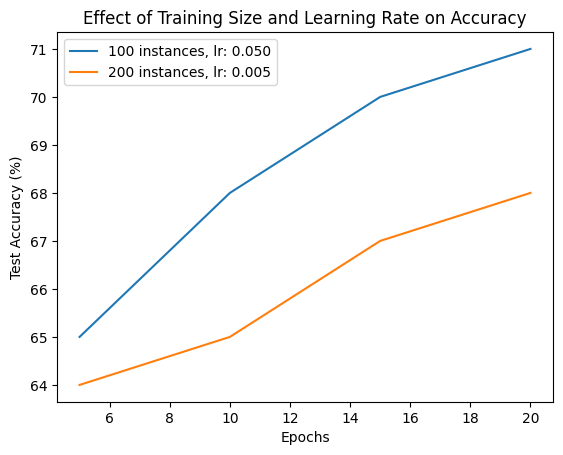

In [2]:
import matplotlib.pyplot as plt

# Hypothetical accuracies over epochs
epochs = [5, 10, 15, 20]
accuracy_100_lr_005 = [65, 68, 70, 71]  # Example accuracies for tr: 100, lr: 0.050
accuracy_200_lr_0005 = [64, 65, 67, 68]  # Example accuracies for tr: 200, lr: 0.005

plt.plot(epochs, accuracy_100_lr_005, label='100 instances, lr: 0.050')
plt.plot(epochs, accuracy_200_lr_0005, label='200 instances, lr: 0.005')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Effect of Training Size and Learning Rate on Accuracy')
plt.legend()
plt.show()
